## Definir importaciones necesarias

In [22]:
import plotly.io as pio
import os
import pywt
import matplotlib.pyplot as plt
import numpy as np
import scipy.io.wavfile as wav


In [23]:
plt.style.use('classic')

## Obtención de archivo de audio

> Note que estos archivos son Mono y se debe adaptar a su propio sistema de archivos.

In [24]:
audio_path = "./ECG/"

audio_files_path = list(
    filter(
        lambda x : x.endswith(".wav"),
        os.listdir(audio_path)
    )
)

print(f"Count of audio files: {len(audio_files_path)}")

Count of audio files: 563


## Exploración de la información



In [25]:
index = 0
audio_file_example_path = audio_files_path[index]
audio_file_example = audio_path + audio_file_example_path
print(f"Audio file example: {audio_file_example}")

Audio file example: ./ECG/71471-1K-raw.wav


In [26]:
sample_rate, audio_data = wav.read(audio_file_example)

audio_data = audio_data / np.max(np.abs(audio_data))

In [27]:
# Parámetros de la CWT
wavelet = 'morl'  # Se puede cambiar por otra wavelet, como 'cmor' o 'gaus'
scales = np.arange(1, 60)  # Rango de escalas para la CWT


In [28]:
# Aplicar CWT a la señal de ECG
coefficients, frequencies = pywt.cwt(
    audio_data, 
    scales, 
    wavelet, 
    1 / sample_rate
)


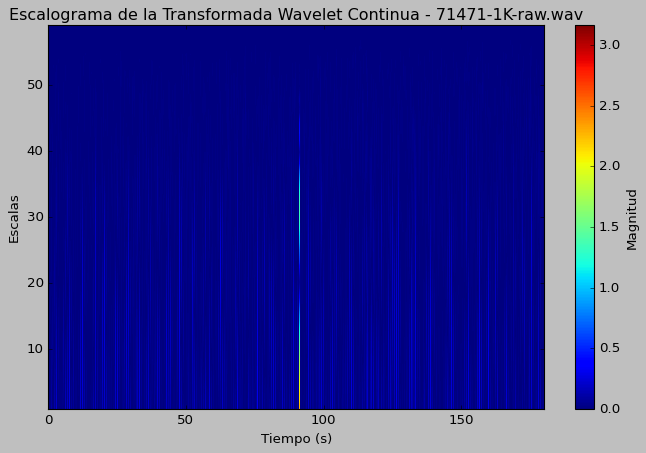

In [ ]:
# Graficar el escalograma
plt.figure(figsize=(10, 6))
plt.imshow(
    np.abs(coefficients), 
    extent=[
        0, 
        len(audio_data)/sample_rate,  
        1, 
        max(scales)
    ], 
    cmap='jet', 
    aspect='auto',
    vmax=np.max(np.abs(coefficients)), 
    vmin=0
)
plt.colorbar(label='Magnitud')
plt.xlabel('Tiempo (s)')
plt.ylabel('Escalas')
plt.title(f'Escalograma de la Transformada Wavelet Continua - {audio_file_example_path}')
#plt.ylim(40, 50) 
plt.show()

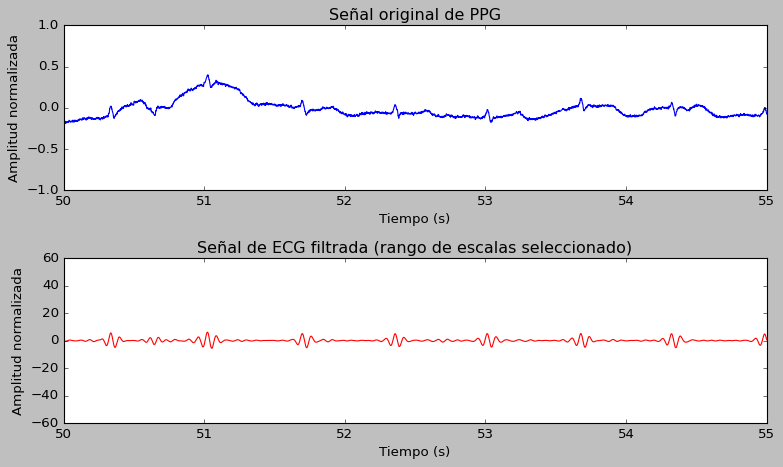

In [32]:
# Definir el rango de escalas que quieres utilizar para el filtro
escala_min = 40  # Escala mínima (ajusta según la frecuencia de interés)
escala_max = 80  # Escala máxima (ajusta según la frecuencia de interés)

# Sumar los coeficientes de las escalas en el rango seleccionado
filtered_signal = np.sum(coefficients[escala_min:escala_max, :], axis=0)

times = np.arange(0, len(audio_data)/sample_rate, 1/sample_rate)  # Tiempos de muestreo

# Graficar la señal original y la señal filtrada
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(times, audio_data, color="blue")
plt.title("Señal original de PPG")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud normalizada")
plt.xlim(50, 55)  # Zoom en el rango de x entre 20 y 60
#plt.ylim(-0.1, 0.12) 

plt.subplot(2, 1, 2)
plt.plot(times, filtered_signal, color="red")
plt.title("Señal de ECG filtrada (rango de escalas seleccionado)")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud normalizada")

plt.tight_layout()
plt.xlim(50, 55)  # Zoom en el rango de x entre 20 y 60
#plt.ylim(-0.1, 0.12) 



plt.show()